# NumPy-快速处理数据

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ch
ch.set_ch()
%matplotlib inline

## ufunc函数

比较sin()在math模块和numpy模块中计算的时间。

In [2]:
import math

x = [i * 0.001 for i in xrange(1000000)]

def sin_math(x):
    for i, t in enumerate(x):
        x[i] = math.sin(t)

def sin_numpy(x):
    np.sin(x, x)

def sin_numpy_loop(x):
    for i, t in enumerate(x):
        x[i] = np.sin(t)

xl = x[:]
%time sin_math(x)

xa = np.array(x)
%time sin_numpy(xa)

xl = x[:]
%time sin_numpy_loop(x)

Wall time: 688 ms
Wall time: 32 ms
Wall time: 3.31 s


## 自定义ufunc函数

画出下图样式的三角波。拐点分别为0,0.4,0.6,1

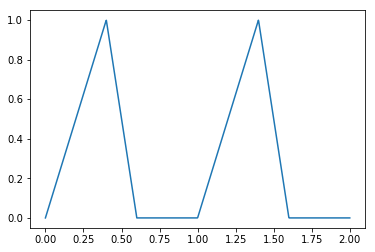

In [4]:
def triangle_wave(x, c, c0, hc):
    x = x - int(x) # 三角波的周期为1，因此只取x坐标的小数部分进行计算
    if x >= c: r = 0.0
    elif x < c0: r = x / c0 * hc
    else: r = (c-x) / (c-c0) * hc
    return r

x = np.linspace(0, 2, 1000)
triangle_ufunc = np.frompyfunc(triangle_wave, 4, 1)
y = triangle_ufunc(x, 0.6, 0.4, 1.0)

plt.plot(x,y)

## 广播

画出z=x*exp{-x^2-y^2}的平面

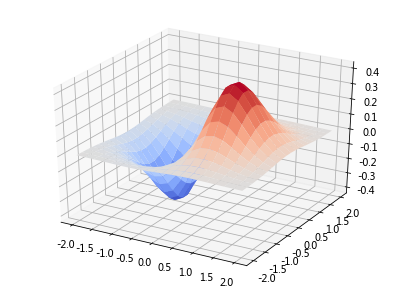

In [3]:
x, y = np.ogrid[-2:2:20j, -2:2:20j]#返回长度为20的数组
z = x * np.exp( - x**2 - y**2)

#%figonly=使用`ogrid`计算二元函数的曲面
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pylab as pl

fig = pl.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap="coolwarm", linewidth=0.2)

## 统计函数

画出“height.csv”中，每一个年龄段的平均年龄。

[[  18.   173.4]
 [   7.8  126.2]
 [   8.5  131.2]
 [  12.5  155. ]
 [   7.4  126.8]
 [  15.   170.4]
 [   7.1  121.8]
 [  15.2  169.3]
 [  19.2  176.8]
 [  16.6  175.2]
 [  18.7  175.9]
 [  13.3  160.4]
 [  19.1  174.6]
 [  15.1  169.9]
 [  16.7  173.1]
 [  12.7  155.8]
 [  19.3  175.4]
 [  18.6  174.4]
 [  11.8  148.5]
 [  15.5  172.5]
 [  17.2  175.2]
 [  18.3  175.6]
 [   7.1  123.1]
 [  18.5  170.8]
 [   7.4  125. ]
 [   7.4  128.4]
 [   9.8  140.9]
 [  16.8  175.8]
 [  10.   142.8]
 [  10.9  146.3]
 [   9.4  137.2]
 [  13.5  163.2]
 [  15.8  174.7]
 [  18.4  174.3]
 [  10.4  143.6]
 [  12.4  153.3]
 [   7.1  127.2]
 [  16.2  171.9]
 [  12.2  156.6]
 [   9.4  135.4]
 [  16.6  172.4]
 [  18.6  176.8]
 [   9.9  140.2]
 [  11.   148. ]
 [  18.3  173. ]
 [  18.9  172. ]
 [  10.1  143.1]
 [  13.7  165. ]
 [  15.2  169.9]
 [  12.5  153.6]
 [  15.9  178.2]
 [  10.4  143.7]
 [  17.2  173.9]
 [  11.5  151.1]
 [  12.5  154.1]
 [  19.2  178.8]
 [   8.6  132.1]
 [  12.3  153.6]
 [   9.3  137.

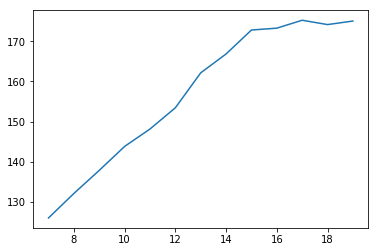

In [14]:
d = np.loadtxt("height.csv", delimiter=",")
print d #第一列为身高，第二列为年龄

sums = np.histogram(d[:, 0], bins=range(7, 21), weights=d[:, 1])[0] # 获得每个年龄段的身高之和
cnts = np.histogram(d[:, 0], bins=range(7, 21))[0] # 除以每个年龄段的人数
print sums / cnts

plt.plot(range(7,20), sums/cnts)

## 多项式函数

画出3,5,7阶多项式对于sin（）函数的误差图像图像

In [6]:
np.set_printoptions(suppress=True, precision=4)

x = np.linspace(-np.pi / 2, np.pi / 2, 1000) 
y = np.sin(x) 

for deg in [3, 5, 7]:
    a = np.polyfit(x, y, deg)  
    error = np.abs(np.polyval(a, x) - y)  
    print "degree {}: {}".format(deg, a)
    print "max error of order %d:" % deg, np.max(error)

degree 3: [-0.145  -0.      0.9887  0.    ]
max error of order 3: 0.00894699376707
degree 5: [ 0.0076 -0.     -0.1658  0.      0.9998 -0.    ]
max error of order 5: 0.000157408614171
degree 7: [-0.0002  0.      0.0083 -0.     -0.1667  0.      1.     -0.    ]
max error of order 7: 1.52682558241e-06


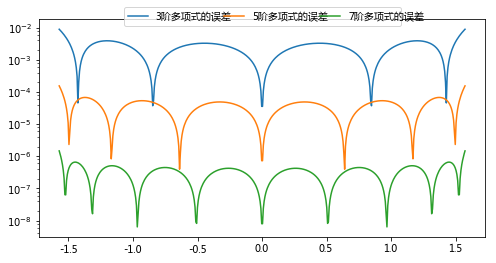

In [7]:
#%figonly=各阶多项式近似正弦函数的误差
plt.figure(figsize=(8, 4))

x = np.linspace(-np.pi / 2, np.pi / 2, 500)
y = np.sin(x)

for deg in [3, 5, 7]:
    a = np.polyfit(x, y, deg)
    error = np.abs(np.polyval(a, x) - y)
    plt.semilogy(x, error, label=u"{}阶多项式的误差".format(deg))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08),
          ncol=3, fancybox=True)
plt.axis('tight');